In [1]:
%matplotlib inline

# TODO: Purge packages that are not used
import seaborn as sns
import pandas as pd
import libpysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import osmnx # For querying OSM using shapefiles
from shapely import wkt

pd.options.display.max_seq_items = 2000

crs = "epsg:4326"


In [2]:
# Load the CBS buurtkaart into a GeoDataFrame
# TODO: Select the right columns, these are just a few for building the method
path = '/home/levi/Studie/AI_jaar_2/UC/UC_Project/WijkBuurtkaart_2020_v3/buurt_2020_v3.shp'
columns = ["BU_CODE", "GM_NAAM", "P_00_14_JR", 'P_00_14_JR', 'P_65_EO_JR', 'P_HOOGINKP', 'P_LAAGINKP']
gdf = gpd.read_file(path, include_fields=columns)

In [3]:
# Visualise some information
gdf.info()
gdf.head(5)
gdf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BU_CODE     13903 non-null  object  
 1   GM_NAAM     13903 non-null  object  
 2   P_00_14_JR  13903 non-null  int64   
 3   P_65_EO_JR  13903 non-null  int64   
 4   P_LAAGINKP  13903 non-null  int64   
 5   P_HOOGINKP  13903 non-null  int64   
 6   geometry    13903 non-null  geometry
dtypes: geometry(1), int64(4), object(2)
memory usage: 760.4+ KB


Index(['BU_CODE', 'GM_NAAM', 'P_00_14_JR', 'P_65_EO_JR', 'P_LAAGINKP',
       'P_HOOGINKP', 'geometry'],
      dtype='object')

In [4]:
# Select the relevant rows
# TODO: Use more cities than just amsterdam

gdf = gdf[gdf["GM_NAAM"] == "Amsterdam"]

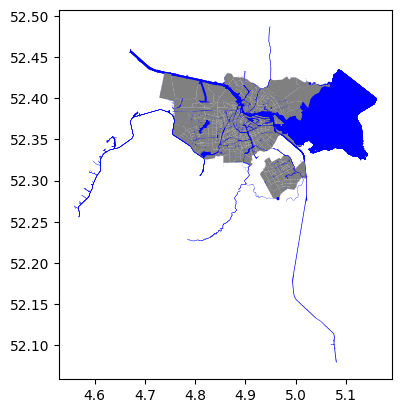

In [5]:
# Fetch the OSM green- and bluespace data
# TODO: Select all required features and combine them into %green and %blue
# TODO: Some neighborhoods have an unreal amount of water in them
# TODO: I think I messed something up because this takes like 20 minutes

# Transfrom the buurtkaart to normal coordinates used by normal people
gdf.to_crs(crs, inplace=True)

# Features that can be considered blue space
blue_features = {
    'natural': 'water'
}

# # Features that can be considered green space
# green_features = {
#     'natural': 'water'
# }

# Get natural water for all neighborhoods and visualise
fig, ax = plt.subplots(1,1)
cnt = 0
for i, row in gdf.iterrows():
    
    print(f"{cnt}/{len(gdf)-1}", end='\r')
    cnt += 1

    try:
        blue = osmnx.features.features_from_polygon(row["geometry"], blue_features)
        blue.plot(ax=ax, color='blue')
    except:
        pass

    gpd.GeoSeries(row["geometry"], crs=crs).plot(ax=ax, color="grey")
plt.show()



In [21]:
# Load Depression risk data fromm buurtatlas
# TODO: Deal with missing values :(
# TODO: Merge data into the big gdf
# TODO: Get buurtatlas data for the other cities we want to use
path_buurtatlas = '/home/levi/Studie/AI_jaar_2/UC/UC_Project/data/MATIG_HOOG_RISICO_ANGST_DEPRESSIE_BUURTEN.csv'
df_buurtatlas = pd.read_csv(path_buurtatlas)

df_buurtatlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEBIED_NAAM  481 non-null    object 
 1   18_en_ouder  447 non-null    float64
 2   18_tot_65    443 non-null    float64
 3   65_en_ouder  401 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


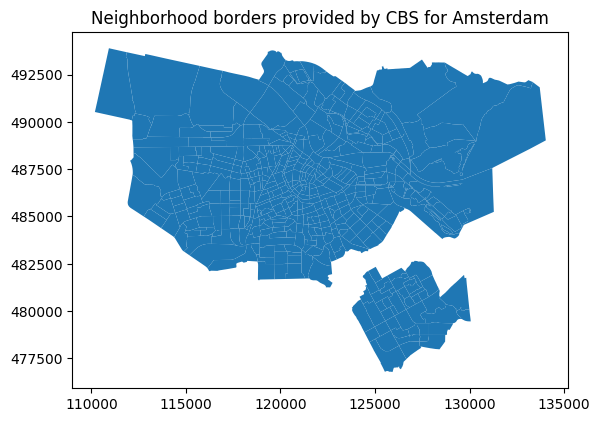

In [38]:
# Visualise the borders in Amsterdam to compare to buurtatlas
gdf_amsterdam = gdf[gdf["GM_NAAM"] == "Amsterdam"]
gdf_amsterdam.plot()

plt.title("Neighborhood borders provided by CBS for Amsterdam")
plt.show()


In [36]:
# Compare the names of BuurtAtlas and CBS 
# They should be the same
# TODO: Deal with the few exceptions manually
names_cbs = gdf_amsterdam.sort_values("BU_NAAM")["BU_NAAM"].unique()
names_ba = df_buurtatlas.sort_values("GEBIED_NAAM")["GEBIED_NAAM"].unique()

for i in range(len(names_cbs)):
    if names_cbs[i] not in names_ba:
        print(f"{names_cbs[i]} is not found in the buurtatlas names")

for i in range(len(names_ba)):
    if names_ba[i] not in names_cbs:
        print(f"{names_ba[i]} is not found in the buurtatlas names")

BelgiÃ«plein e.o. is not found in the buurtatlas names
None is not found in the buurtatlas names
Belgiëplein e.o. is not found in the buurtatlas names
Gemeente: Amsterdam is not found in the buurtatlas names
Nederland is not found in the buurtatlas names
nan is not found in the buurtatlas names
